###### The purpose of the following analysis is to discover if there was a significant difference in market returns during the period before covid, and the period after covid

In [1]:
#dependancies
import pandas as pd
from pathlib import Path
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import requests
import json
import pprint
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading csv 
market_path = Path("../Resources/market_returns_complete.csv")
market_df = pd.read_csv(market_path, encoding="utf-8")
market_df.head()

,Unnamed: 0,Symbol,GICS Sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
0,0,MMM,Industrials,Large Cap,5.755600e+10,3648116.0,-1.677571,-32.507878
1,1,AOS,Industrials,Large Cap,1.143200e+10,1022067.0,-0.272539,19.474018
2,2,ABT,Health Care,Large Cap,1.987450e+11,4775809.0,124.695834,27.573790
3,3,ABBV,Health Care,Large Cap,2.535990e+11,5969209.0,40.686585,81.421191
4,4,ACN,Information Technology,Large Cap,1.987340e+11,2552522.0,79.451358,26.548419


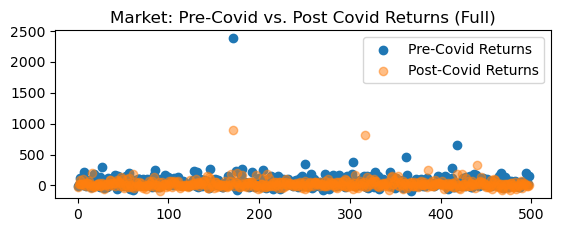

In [4]:
#scatter plot of data
plt.subplot(2, 1, 1)
plt.scatter(range(len(market_df['Symbol'])), market_df['Return from 2017-2019 (Pre-Covid)'], label="Pre-Covid Returns")
plt.scatter(range(len(market_df['Symbol'])), market_df['Return from 2020-2022 (Post-Covid)'], label="Post-Covid Returns", alpha = 0.5)
plt.legend()
plt.title('Market: Pre-Covid vs. Post Covid Returns (Full)')
plt.savefig("Market_Scatter_Pre_vs_Post_Full.png")

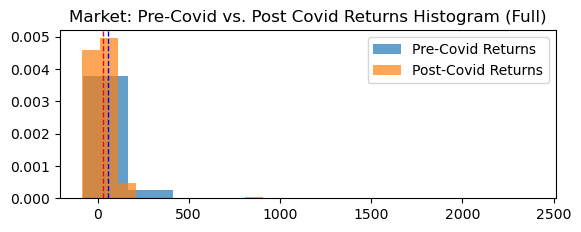

In [5]:
#plotting a histogram
plt.subplot(2, 1, 2)
plt.hist(market_df['Return from 2017-2019 (Pre-Covid)'], 10, density=True, alpha=0.7, label="Pre-Covid Returns")
plt.hist(market_df['Return from 2020-2022 (Post-Covid)'], 10, density=True, alpha=0.7, label="Post-Covid Returns")
plt.axvline(market_df['Return from 2017-2019 (Pre-Covid)'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(market_df['Return from 2020-2022 (Post-Covid)'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.legend()  
plt.title('Market: Pre-Covid vs. Post Covid Returns Histogram (Full)')
plt.savefig("Market_Histogram_Pre_vs_Post_Full.png")

###### Histogram shows that data is highly positively skewed

###### Null Hypothesis: µ(returns of market precovid) = µ(returns of market post covid)

###### Alternative Hypothesis: µ(returns of market precovid) ≠ µ(returns of market post covid)


In [6]:
#running a two-sample t-test
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
st.ttest_ind(market_df['Return from 2017-2019 (Pre-Covid)'], market_df['Return from 2020-2022 (Post-Covid)'], equal_var=False)

Ttest_indResult(statistic=4.792199799245037, pvalue=1.9716443542725045e-06)

###### The p value is ~0.00 which is significant at every level, therefore we can reject the null. The results imply that COVID-19 had a negative impact on the returns of market in general.

In [7]:
#finding outliers for pre-covid returns
quartiles = market_df['Return from 2017-2019 (Pre-Covid)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of pre-covid returns is: {lowerq}")
print(f"The upper quartile of pre-covid returns is: {upperq}")
print(f"The interquartile range of pre-covid returns is: {iqr}")
print(f"The the median of pre-covid returns is: {quartiles[0.5]} ")

lower_bound_pre = lowerq - (1.5*iqr)
upper_bound_pre = upperq + (1.5*iqr)

print(f"The lower bound of pre-covid returns is: {lower_bound_pre}")
print(f"The upper bound of pre-covid returns is: {upper_bound_pre}")

The lower quartile of pre-covid returns is: 8.508907534915206
The upper quartile of pre-covid returns is: 83.84918300744795
The interquartile range of pre-covid returns is: 75.34027547253274
The the median of pre-covid returns is: 42.98077611045537 
The lower bound of pre-covid returns is: -104.5015056738839
The upper bound of pre-covid returns is: 196.85959621624704


In [8]:
#finding outliers for post-covid returns
quartiles = market_df['Return from 2020-2022 (Post-Covid)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of post-covid returns is: {lowerq}")
print(f"The upper quartile of post-covid returns is: {upperq}")
print(f"The interquartile range of post-covid returns is: {iqr}")
print(f"The the median of post-covid returns is: {quartiles[0.5]} ")

lower_bound_post = lowerq - (1.5*iqr)
upper_bound_post = upperq + (1.5*iqr)

print(f"The lower bound of post-covid returns is: {lower_bound_post}")
print(f"The upper bound of post-covid returns is: {upper_bound_post}")

The lower quartile of post-covid returns is: -6.115634614745234
The upper quartile of post-covid returns is: 45.93008260377963
The interquartile range of post-covid returns is: 52.045717218524864
The the median of post-covid returns is: 18.74457849320538 
The lower bound of post-covid returns is: -84.18421044253253
The upper bound of post-covid returns is: 123.99865843156692


In [9]:
#displaying outliers
outlier_condition_pre = (market_df['Return from 2017-2019 (Pre-Covid)']>=upper_bound_pre)|(market_df['Return from 2017-2019 (Pre-Covid)']<=lower_bound_pre)
outlier_condition_post = (market_df['Return from 2020-2022 (Post-Covid)']>=upper_bound_post)|(market_df['Return from 2020-2022 (Post-Covid)']<=lower_bound_post)
outlier_condition = outlier_condition_post | outlier_condition_pre

outliers_list = market_df.loc[outlier_condition, :]
outliers_list

,Unnamed: 0,Symbol,GICS Sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
7,7,ADBE,Information Technology,Large Cap,2.417680e+11,4036804.0,217.451412,1.978788
16,16,ALB,Materials,Large Cap,2.534300e+10,2082659.0,-17.464143,195.047620
27,27,AMD,Information Technology,Large Cap,1.786690e+11,70480925.0,298.598951,38.220222
48,48,ANET,Information Technology,Large Cap,5.291400e+10,3371417.0,108.253027,135.997672
57,57,AXON,Industrials,Large Cap,1.329600e+10,1144503.0,201.270505,124.169144
61,61,BBWI,Consumer Discretionary,Mid Cap,8.163000e+09,3947983.0,-72.353122,185.628373
84,84,CDNS,Information Technology,Large Cap,6.622400e+10,2032112.0,175.226099,128.897120
85,85,CZR,Consumer Discretionary,Large Cap,1.242400e+10,2913148.0,245.087702,-30.965815
91,91,CCL,Consumer Discretionary,Large Cap,2.335300e+10,43572048.0,-2.316675,-84.303796
128,130,CPRT,Industrials,Large Cap,4.351400e+10,2240056.0,226.952132,33.238508


In [10]:
#creating dataframe without outliers
no_outliers_df = market_df.loc[outlier_condition!=True, :]
no_outliers_df

,Unnamed: 0,Symbol,GICS Sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
0,0,MMM,Industrials,Large Cap,5.755600e+10,3648116.0,-1.677571,-32.507878
1,1,AOS,Industrials,Large Cap,1.143200e+10,1022067.0,-0.272539,19.474018
2,2,ABT,Health Care,Large Cap,1.987450e+11,4775809.0,124.695834,27.573790
3,3,ABBV,Health Care,Large Cap,2.535990e+11,5969209.0,40.686585,81.421191
4,4,ACN,Information Technology,Large Cap,1.987340e+11,2552522.0,79.451358,26.548419
...,...,...,...,...,...,...,...,...
493,498,YUM,Consumer Discretionary,Large Cap,3.852300e+10,1753820.0,58.338573,26.937562
494,499,ZBRA,Information Technology,Large Cap,1.576100e+10,364258.0,193.497338,-1.011464
495,500,ZBH,Health Care,Large Cap,2.969600e+10,1429980.0,43.207864,-12.438324
496,501,ZION,Financials,Mid Cap,5.349000e+09,5914782.0,18.358478,-6.111537


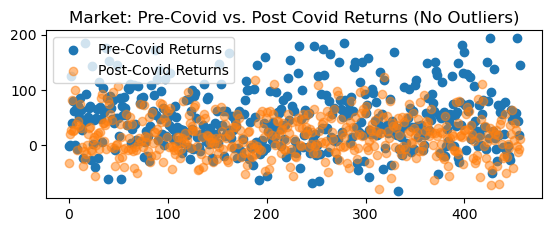

In [11]:
#scatter plot of data without outliers
plt.subplot(2, 1, 1)
plt.scatter(range(len(no_outliers_df['Symbol'])), no_outliers_df['Return from 2017-2019 (Pre-Covid)'], label="Pre-Covid Returns")
plt.scatter(range(len(no_outliers_df['Symbol'])), no_outliers_df['Return from 2020-2022 (Post-Covid)'], label="Post-Covid Returns", alpha = 0.5)
plt.legend()
plt.title('Market: Pre-Covid vs. Post Covid Returns (No Outliers)')
plt.savefig("Market_Scatter_Pre_vs_Post_No_Outliers.png")

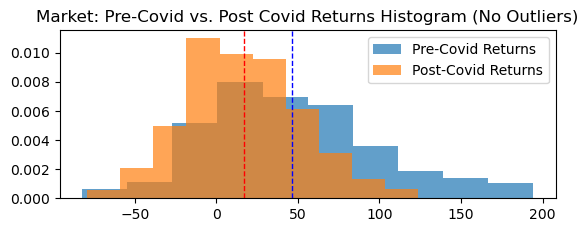

In [12]:
#plotting a histogram of data without outliers
plt.subplot(2, 1, 2)
plt.hist(no_outliers_df['Return from 2017-2019 (Pre-Covid)'], 10, density=True, alpha=0.7, label="Pre-Covid Returns")
plt.hist(no_outliers_df['Return from 2020-2022 (Post-Covid)'], 10, density=True, alpha=0.7, label="Post-Covid Returns")
plt.axvline(no_outliers_df['Return from 2017-2019 (Pre-Covid)'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(no_outliers_df['Return from 2020-2022 (Post-Covid)'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.legend()  
plt.title('Market: Pre-Covid vs. Post Covid Returns Histogram (No Outliers)')
plt.savefig("Market_Histogram_Pre_vs_Post_No_Outliers.png")

###### Histogram shows that data is slightly positively skewed, with pre-covid returns being more positively skewed

###### Null Hypothesis: µ(returns of market precovid) = µ(returns of market post covid)


###### Alternative Hypothesis: µ(returns of market precovid) ≠ µ(returns of market post covid)


In [13]:
#running a two-sample t-test on the data without outliers
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
st.ttest_ind(no_outliers_df['Return from 2017-2019 (Pre-Covid)'], no_outliers_df['Return from 2020-2022 (Post-Covid)'], equal_var=False)

Ttest_indResult(statistic=9.774880979588726, pvalue=2.1189031494824718e-21)

###### The p value is ~0.00 which is significant at every level, therefore we can reject the null. The results imply that COVID-19 had a negative impact on the returns of market in general.